In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# Prepocessing data
# Source lecture DAT200. File: rawDataInspection_01.py


In [4]:
df = pd.read_csv('CA3-train.csv')
df

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f16,f17,f18,f19,f20,f21,f22,f23,f24,label
0,0,1.0,0.0,1.0,179.0,99.0,99.0,139.0,74.5822,301.0590,...,0.0,0.0,99.0,0.1788,0.3583,0.0132,7.0,2.0,2.0,0.0
1,1,1.0,0.0,1.0,298.0,258.0,258.0,239.0,181.8275,135.3403,...,5290.0,0.0,0.0,0.4355,0.3375,0.0458,5.0,2.0,4.0,2.0
2,2,1.0,1.0,1.0,99.0,139.0,139.0,159.0,83.0692,187.6926,...,0.0,1.0,2442.0,0.0762,0.1167,0.0200,8.0,6.0,1.0,2.0
3,3,1.0,1.0,0.0,238.0,139.0,139.0,258.0,248.3948,505.5022,...,397.0,0.0,0.0,0.2176,0.3791,0.0139,5.0,8.0,5.0,1.0
4,4,1.0,1.0,0.0,358.0,179.0,179.0,219.0,127.8251,117.0438,...,0.0,0.0,0.0,0.2923,0.2908,0.0539,3.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7103,7103,1.0,1.0,1.0,99.0,139.0,139.0,99.0,92.5054,111.0281,...,0.0,1.0,1032.0,0.1476,0.2076,0.0093,5.0,6.0,1.0,0.0
7104,7104,1.0,1.0,0.0,80.0,119.0,119.0,159.0,460.7779,101.5972,...,0.0,1.0,715.0,0.1595,0.3440,0.0188,4.0,7.0,1.0,2.0
7105,7105,1.0,1.0,1.0,219.0,99.0,99.0,179.0,69.5881,92.3147,...,0.0,0.0,238.0,0.0001,0.0686,0.0188,6.0,5.0,1.0,1.0
7106,7106,1.0,1.0,0.0,159.0,80.0,80.0,119.0,449.1116,400.0050,...,0.0,0.0,0.0,0.0344,0.6234,0.0171,5.0,8.0,4.0,0.0


In [8]:
X, y = df.iloc[:, 1:25].values, df.iloc[:, 25]

In [30]:
np.unique(y)

array([0., 1., 2.])

In [34]:
X

array([[1., 0., 1., ..., 7., 2., 2.],
       [1., 0., 1., ..., 5., 2., 4.],
       [1., 1., 1., ..., 8., 6., 1.],
       ...,
       [1., 1., 1., ..., 6., 5., 1.],
       [1., 1., 0., ..., 5., 8., 4.],
       [1., 1., 0., ..., 7., 1., 3.]])

In [79]:
df_X = df.iloc[:, 1:25]
df_X

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1.0,0.0,1.0,179.0,99.0,99.0,139.0,74.5822,301.0590,53.6656,...,0.0,0.0,0.0,99.0,0.1788,0.3583,0.0132,7.0,2.0,2.0
1,1.0,0.0,1.0,298.0,258.0,258.0,239.0,181.8275,135.3403,179.4714,...,3.0,5290.0,0.0,0.0,0.4355,0.3375,0.0458,5.0,2.0,4.0
2,1.0,1.0,1.0,99.0,139.0,139.0,159.0,83.0692,187.6926,149.9667,...,0.0,0.0,1.0,2442.0,0.0762,0.1167,0.0200,8.0,6.0,1.0
3,1.0,1.0,0.0,238.0,139.0,139.0,258.0,248.3948,505.5022,231.0000,...,1.0,397.0,0.0,0.0,0.2176,0.3791,0.0139,5.0,8.0,5.0
4,1.0,1.0,0.0,358.0,179.0,179.0,219.0,127.8251,117.0438,44.0114,...,0.0,0.0,0.0,0.0,0.2923,0.2908,0.0539,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7103,1.0,1.0,1.0,99.0,139.0,139.0,99.0,92.5054,111.0281,85.7555,...,0.0,0.0,1.0,1032.0,0.1476,0.2076,0.0093,5.0,6.0,1.0
7104,1.0,1.0,0.0,80.0,119.0,119.0,159.0,460.7779,101.5972,531.6813,...,0.0,0.0,1.0,715.0,0.1595,0.3440,0.0188,4.0,7.0,1.0
7105,1.0,1.0,1.0,219.0,99.0,99.0,179.0,69.5881,92.3147,84.8764,...,0.0,0.0,0.0,238.0,0.0001,0.0686,0.0188,6.0,5.0,1.0
7106,1.0,1.0,0.0,159.0,80.0,80.0,119.0,449.1116,400.0050,392.0051,...,0.0,0.0,0.0,0.0,0.0344,0.6234,0.0171,5.0,8.0,4.0


In [80]:
# =============================================================================
# Descriptive statistics
# =============================================================================
df_X.describe()
#df.iloc[:, 16].describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
count,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,...,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000
mean,1.202026,0.804586,0.401941,156.874930,166.643360,196.047271,168.302195,238.272512,230.066717,219.825159,...,0.398284,530.048818,0.224254,297.630979,0.221186,0.331006,0.030905,5.881964,4.886747,2.899268
std,0.493933,0.396547,0.490325,80.914806,74.588417,107.521931,77.616408,207.299347,207.017288,198.373088,...,0.707898,1927.718921,0.417120,699.293958,0.376378,0.451033,0.027579,1.536845,2.878474,1.860700
min,1.000000,0.000000,0.000000,0.000000,20.000000,20.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-4.325500,-1.206000,0.000500,2.000000,1.000000,1.000000
25%,1.000000,1.000000,0.000000,99.000000,119.000000,119.000000,119.000000,111.037400,105.016925,88.459000,...,0.000000,0.000000,0.000000,0.000000,0.073800,0.124575,0.015300,5.000000,2.000000,1.000000
50%,1.000000,1.000000,0.000000,139.000000,159.000000,179.000000,159.000000,173.704850,167.636150,150.273100,...,0.000000,0.000000,0.000000,0.000000,0.147800,0.220600,0.023400,6.000000,4.000000,2.000000
75%,1.000000,1.000000,1.000000,199.000000,199.000000,239.000000,199.000000,289.366625,281.537275,284.385325,...,1.000000,223.750000,0.000000,298.000000,0.259100,0.354800,0.036900,7.000000,7.000000,4.000000
max,8.000000,1.000000,1.000000,1036.000000,1036.000000,1628.000000,977.000000,1924.134700,1924.134700,1070.361600,...,5.000000,35448.000000,1.000000,11140.000000,4.491700,4.491700,0.362300,10.000000,10.000000,10.000000


In [64]:
# Check for positive values f16

positive_f16 = np.where(df['f16']>0, True, False)
# count True
positive_f16.sum()

2145

In [72]:
# Drop rows with zero values

extract_positive_f16 = df[df['f16']>0]['f16']
extract_positive_f16

1        5290.0
3         397.0
6        2248.0
11        358.0
12       2306.0
         ...   
7083     1569.0
7089      596.0
7090    10556.0
7099      517.0
7102      477.0
Name: f16, Length: 2145, dtype: float64

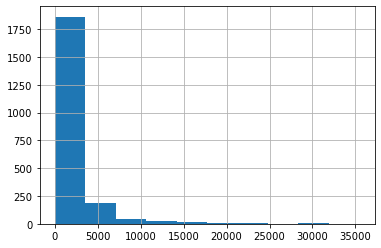

In [73]:
# Histogram positive f16
extract_positive_f16.hist()

In [77]:
# Descriptive statistics for posive f16

extract_positive_f16.describe()

count     2145.000000
mean      1756.450816
std       3187.966249
min         20.000000
25%        318.000000
50%        676.000000
75%       1670.000000
max      35448.000000
Name: f16, dtype: float64

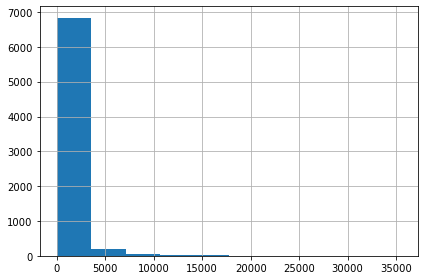

In [59]:
# =============================================================================
# Histograms
# =============================================================================

df.iloc[:, 16].hist()
plt.tight_layout()
plt.show()

Notes AH: Possible outliers f16, very high max relative to the rest.
Also a lot of zero values more than two-thirds. Consider dropping the column.

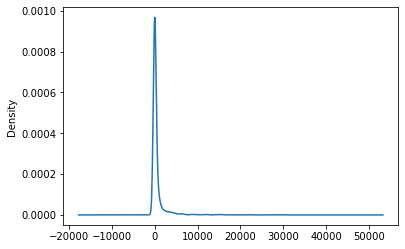

In [196]:
# =============================================================================
# Density plots
# =============================================================================

df['f16'].plot(kind='density')
plt.show()

In [208]:
# Sort values for f16

df['f16'].sort_values(ascending=False)[0:50]

4366    35448.0
6861    35448.0
3295    30016.0
5336    30016.0
3089    30016.0
3764    30016.0
1108    24987.0
4808    22514.0
1539    22218.0
2019    22218.0
3997    22218.0
2481    22218.0
2160    17872.0
4439    17872.0
4162    17872.0
1876    17019.0
2058    17019.0
6419    15604.0
6589    15604.0
332     15604.0
2150    15319.0
3985    15319.0
2888    15319.0
1597    15319.0
6767    15319.0
4959    15319.0
1870    14971.0
2067    14824.0
4923    14824.0
6088    14824.0
62      14824.0
4543    14146.0
2246    14146.0
6681    14146.0
343     14146.0
1084    14146.0
5137    14146.0
929     14047.0
3443    12433.0
680     12433.0
4793    12433.0
4609    12432.0
5079    12432.0
5633    12364.0
4887    12364.0
4460    12185.0
1720    11988.0
1699    11988.0
1639    11655.0
66      11655.0
Name: f16, dtype: float64

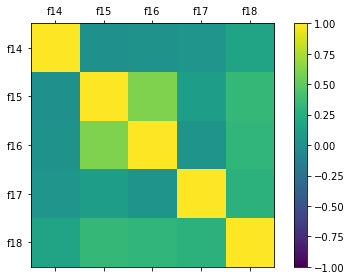

In [106]:
# =============================================================================
# Plot correlation matrix
# =============================================================================

# plot correlation matrix for the first four features
df_sub = df.iloc[:, 14:19]
correlations = df1to4.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 5, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(df_sub.columns))
ax.set_yticklabels(list(df_sub.columns))
plt.tight_layout()
plt.show()

In [111]:
corr_f15f16 = df.iloc[:, [15, 16]].corr()
corr_f15f16

,f15,f16
f15,1.000000,0.616109
f16,0.616109,1.000000


In [150]:
# correlations all f16
corr_all = df_X.corr()
corr_all.iloc[:, 15]

f1     0.057011
f2    -0.006370
f3     0.170024
f4     0.042612
f5     0.045459
f6     0.069253
f7     0.074586
f8     0.012062
f9     0.057376
f10   -0.015906
f11    0.036357
f12    0.058632
f13    0.054526
f14    0.023406
f15    0.616109
f16    1.000000
f17    0.035619
f18    0.314282
f19    0.048388
f20    0.057016
f21   -0.101244
f22   -0.007245
f23    0.058998
f24    0.119955
Name: f16, dtype: float64

In [172]:
# Standardizing

sc = StandardScaler()
df_X_std = sc.fit_transform(df_X)
df_X_std


array([[-0.40904384, -2.02912558,  1.21980506, ...,  0.72753905,
        -1.0029449 , -0.48332987],
       [-0.40904384, -2.02912558,  1.21980506, ..., -0.57392001,
        -1.0029449 ,  0.59161028],
       [-0.40904384,  0.49282312,  1.21980506, ...,  1.37826859,
         0.38677826, -1.02079995],
       ...,
       [-0.40904384,  0.49282312,  1.21980506, ...,  0.07680952,
         0.03934747, -1.02079995],
       [-0.40904384,  0.49282312, -0.81980312, ..., -0.57392001,
         1.08163983,  0.59161028],
       [-0.40904384,  0.49282312, -0.81980312, ...,  0.72753905,
        -1.35037569,  0.0541402 ]])

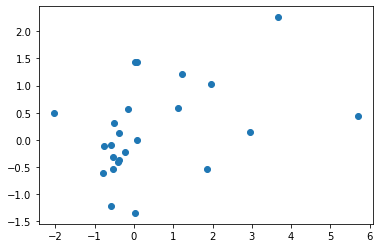

In [185]:
plt.scatter(df_X_std[14], df_X_std[15])